In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import neighbors, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv("C:\\Users\\Priyesh\\Downloads\\archive (6)\\sgemm_product.csv", index_col=None, header=0)

In [63]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [64]:
df.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


In [65]:
df.shape

(241600, 18)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [67]:
df.duplicated().sum()

0

In [68]:
df.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [69]:
df['Runtime']=df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
df = df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [70]:
df['Runtime'].describe()

count    241600.000000
mean        217.571953
std         368.750161
min          13.317500
25%          40.667500
50%          69.790000
75%         228.387500
max        3341.507500
Name: Runtime, dtype: float64

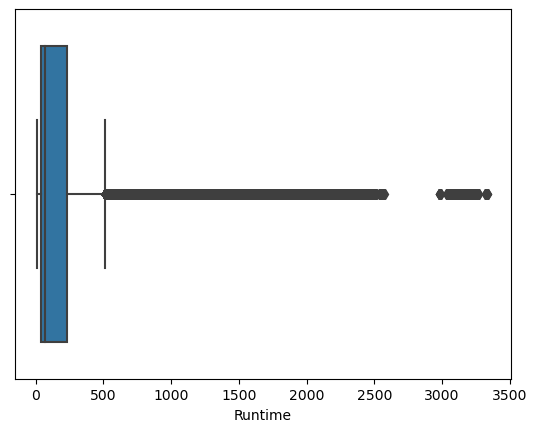

In [71]:
# Checking Outliers
sns.boxplot(x=df['Runtime']);

<AxesSubplot:xlabel='Runtime', ylabel='Density'>

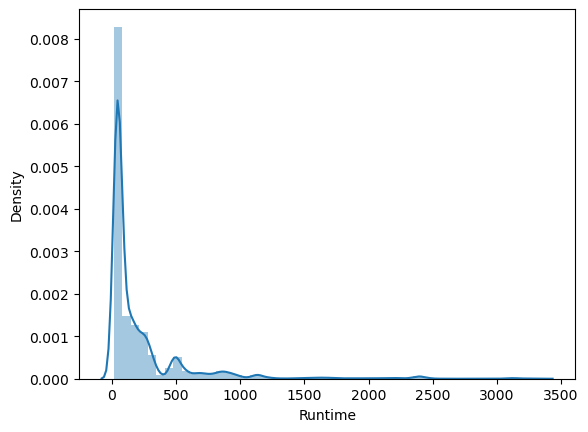

In [72]:
sns.distplot(df['Runtime'])

It looks like the Dataset holds a bunch of values beyond the whisker point.
Although we'll apply the Machine Learning Model that is robust against outliers.

Text(0.5, 1.0, 'Variable Correlation')

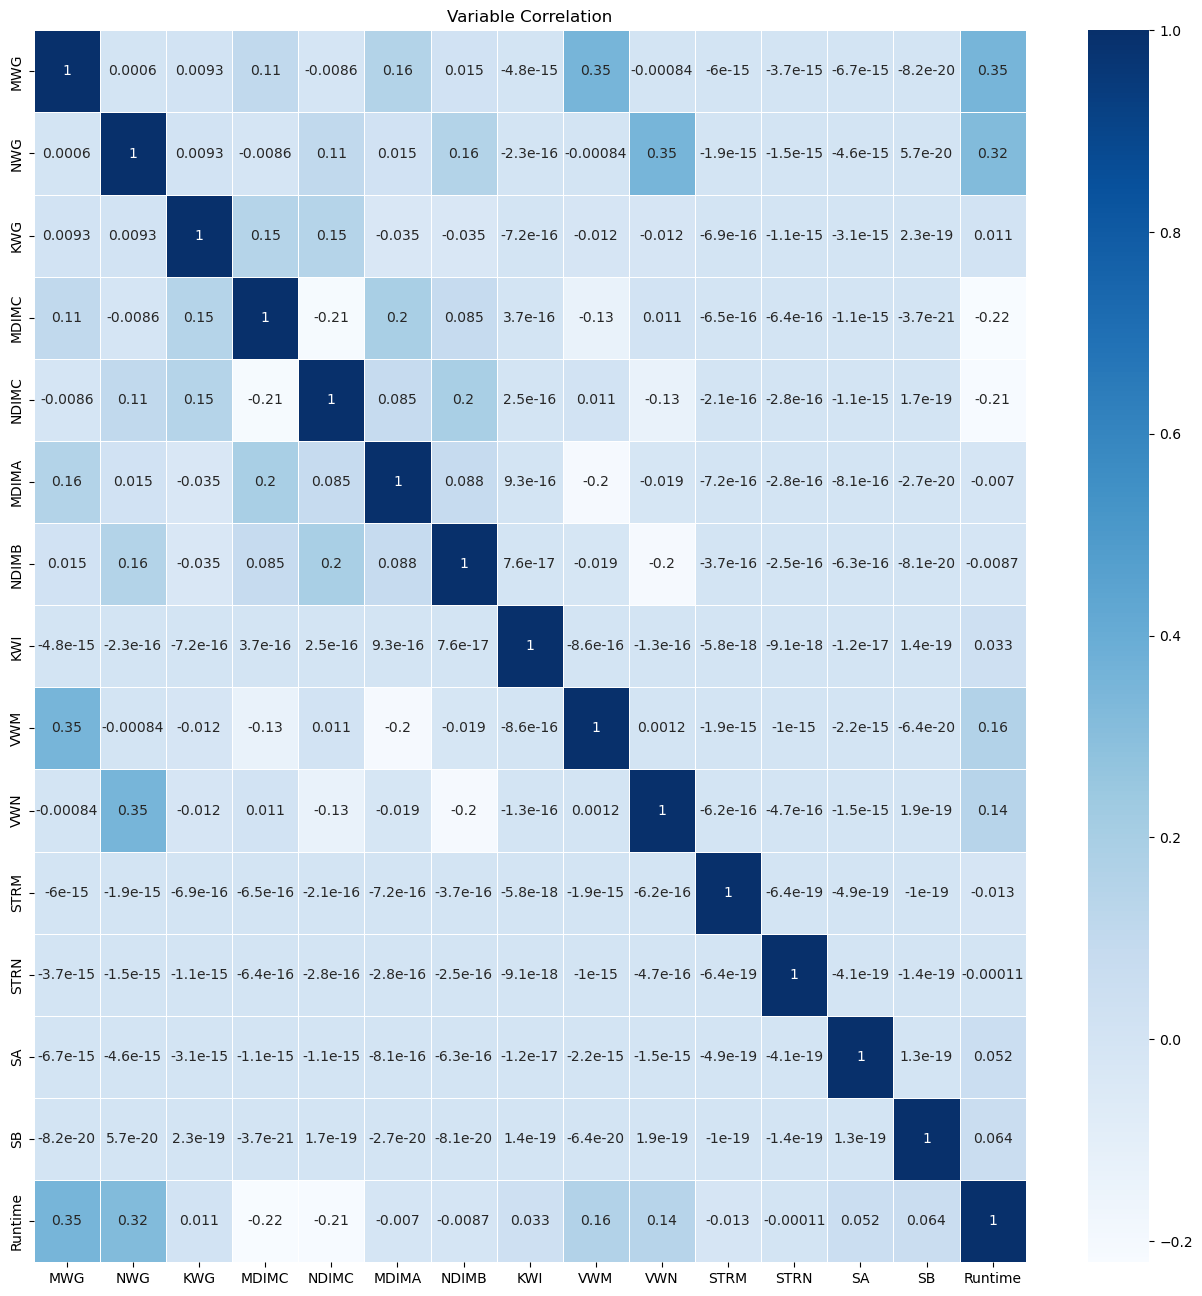

In [73]:
plt.figure(figsize=(16,16))
ax = sns.heatmap(df.corr(),annot=True, linewidths=.5, cmap=plt.cm.Blues)
plt.title('Variable Correlation')

The data doesn't have any feature that has strong correlation with others.

In [74]:
X= df.values[:,0:-1]
Y= df.values[:,-1]

In [75]:
X

array([[ 16.,  16.,  16., ...,   0.,   0.,   0.],
       [ 16.,  16.,  16., ...,   0.,   0.,   1.],
       [ 16.,  16.,  16., ...,   0.,   1.,   0.],
       ...,
       [128., 128.,  32., ...,   1.,   0.,   1.],
       [128., 128.,  32., ...,   1.,   1.,   0.],
       [128., 128.,  32., ...,   1.,   1.,   1.]])

In [76]:
Y.shape

(241600,)

## Regression

In [77]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

In [78]:
X

array([[-1.51675724, -1.51675724, -1.2109972 , ..., -1.        ,
        -1.        , -1.        ],
       [-1.51675724, -1.51675724, -1.2109972 , ..., -1.        ,
        -1.        ,  1.        ],
       [-1.51675724, -1.51675724, -1.2109972 , ..., -1.        ,
         1.        , -1.        ],
       ...,
       [ 1.12045227,  1.12045227,  0.82576574, ...,  1.        ,
        -1.        ,  1.        ],
       [ 1.12045227,  1.12045227,  0.82576574, ...,  1.        ,
         1.        , -1.        ],
       [ 1.12045227,  1.12045227,  0.82576574, ...,  1.        ,
         1.        ,  1.        ]])

In [79]:
from sklearn.model_selection import train_test_split

# Split the data into test & train
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.5,
                                                  random_state=10)

In [80]:
X_train.shape

(120800, 14)

In [81]:
from sklearn.tree import DecisionTreeRegressor

model_DecisionTree= DecisionTreeRegressor()

model_DecisionTree.fit(X_train, Y_train)
Y_pred=model_DecisionTree.predict(X_test)

In [82]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squred: ",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred:  0.9996846726412482
RMSE: 6.503080413837977
Adj R-square: 0.9996846543678329


In [83]:
model_DecisionTree.score(X_train, Y_train)

0.999999999998985

Getting a nice score & accuracy value gives a conclusion that the model is predicting accurately
& not Overfitted.

## Classification

In [84]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

custom_labels = ['Short', 'Moderate', 'Long', 'Very Long']

df_target = pd.qcut(df['Runtime'], q=4, labels=custom_labels)

# Step 4: Convert labels to numerical values
label_mapping = {label: index for index, label in enumerate(custom_labels)}
Y = df_target.map(label_mapping).values

# Step 5: Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)


In [85]:
X

array([[-1.51675724, -1.51675724, -1.2109972 , ..., -1.        ,
        -1.        , -1.        ],
       [-1.51675724, -1.51675724, -1.2109972 , ..., -1.        ,
        -1.        ,  1.        ],
       [-1.51675724, -1.51675724, -1.2109972 , ..., -1.        ,
         1.        , -1.        ],
       ...,
       [ 1.12045227,  1.12045227,  0.82576574, ...,  1.        ,
        -1.        ,  1.        ],
       [ 1.12045227,  1.12045227,  0.82576574, ...,  1.        ,
         1.        , -1.        ],
       [ 1.12045227,  1.12045227,  0.82576574, ...,  1.        ,
         1.        ,  1.        ]])

In [86]:
Y= Y.astype(int)

In [87]:
unique, counts = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts)))

{0: 60401, 1: 60400, 2: 60399, 3: 60400}


Checking Destribution & Dealing with skewedness

<AxesSubplot:xlabel='Runtime', ylabel='Density'>

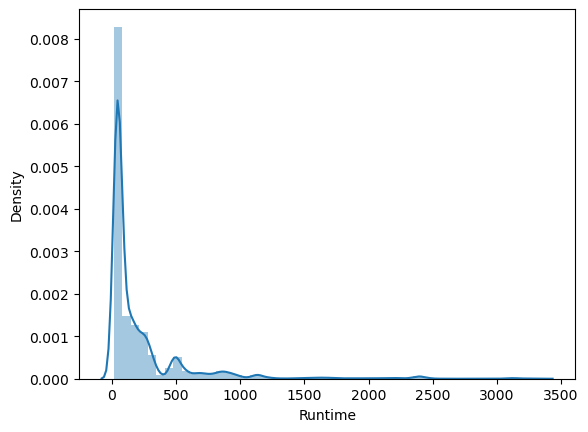

In [88]:
sns.distplot(df['Runtime'])

In [89]:
import pandas as pd

# Assuming df is your DataFrame and 'column_name' is the name of the column you want to analyze.
skewness = df['Runtime'].skew()

skewness


3.9254459949969687

In [90]:
Q1=df['Runtime'].quantile(0.25)
Q3=df['Runtime'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR
MAX=Q3+1.5*IQR
df = df[(df.Runtime>MIN) & (df.Runtime<MAX)]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,214833.0,75.688037,41.968313,16.0000,32.000,64.00,128.0000,128.0000
NWG,214833.0,75.761619,41.997377,16.0000,32.000,64.00,128.0000,128.0000
KWG,214833.0,25.592567,7.839899,16.0000,16.000,32.00,32.0000,32.0000
MDIMC,214833.0,14.475690,8.111065,8.0000,8.000,16.00,16.0000,32.0000
NDIMC,214833.0,14.470700,8.111264,8.0000,8.000,16.00,16.0000,32.0000
MDIMA,214833.0,17.390550,9.375134,8.0000,8.000,16.00,32.0000,32.0000
NDIMB,214833.0,17.388762,9.374445,8.0000,8.000,16.00,32.0000,32.0000
KWI,214833.0,5.005544,3.000002,2.0000,2.000,8.00,8.0000,8.0000
VWM,214833.0,2.339538,1.858623,1.0000,1.000,2.00,4.0000,8.0000
VWN,214833.0,2.345156,1.862122,1.0000,1.000,2.00,4.0000,8.0000


In [91]:
import pandas as pd

# Assuming df is your DataFrame and 'column_name' is the name of the column you want to analyze.
skewness = df['Runtime'].skew()

skewness


1.7654816306918506

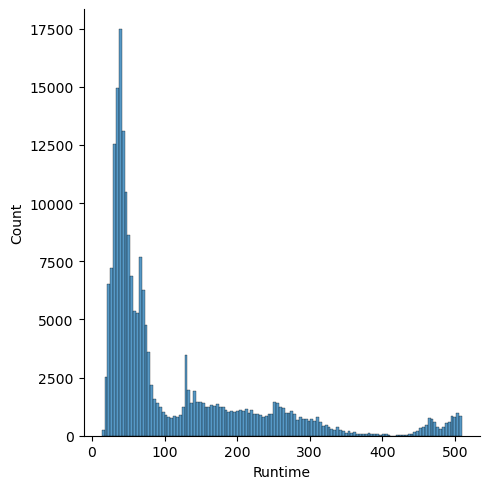

In [92]:
sns.displot(df['Runtime'])

In [93]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(161872, 14)
(79728, 14)
(161872,)
(79728,)


#### Applying Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

classifier= LogisticRegression()
classifier.fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)
print(Y_pred)

[3 1 0 ... 1 2 1]


In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm= confusion_matrix(Y_test, Y_pred)   # always write Y_test, Y_pred in this order everywhere
print(cfm)
print('Classification Report :')
print(classification_report(Y_test, Y_pred))
acc= accuracy_score(Y_test, Y_pred)
print("Accuracy of The Model :", acc)

[[11204  4618  3842   267]
 [ 4667 10258  4756   329]
 [ 2653  5153  9029  3120]
 [  340   194  1500 17798]]
Classification Report :
              precision    recall  f1-score   support

           0       0.59      0.56      0.58     19931
           1       0.51      0.51      0.51     20010
           2       0.47      0.45      0.46     19955
           3       0.83      0.90      0.86     19832

    accuracy                           0.61     79728
   macro avg       0.60      0.61      0.60     79728
weighted avg       0.60      0.61      0.60     79728

Accuracy of The Model : 0.6056717840658238


The model is known for prediction on bi-categorical data but the accuracy on four categories is Obviosly low. 

#### Applying K-Fold

In [96]:
# Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result) # Output of 10 Test that has been Perfomed using each split as a test data at a time.
#finding the mean
print(kfold_cv_result.mean())

[0.60192735 0.59908574 0.60350899 0.60394143 0.60239699 0.605733
 0.6012232  0.60221165 0.60128498 0.60517699]
0.6026490330938646


In [97]:
for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

    
Y_pred=classifier.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm= confusion_matrix(Y_test, Y_pred)   # always write Y_test, Y_pred in this order everywhere
print(cfm)
print('Classification Report :')
print(classification_report(Y_test, Y_pred))
acc= accuracy_score(Y_test, Y_pred)
print("Accuracy of The Model :", acc)

[[11176  4632  3858   265]
 [ 4649 10266  4770   325]
 [ 2635  5153  9051  3116]
 [  334   194  1505 17799]]
Classification Report :
              precision    recall  f1-score   support

           0       0.59      0.56      0.58     19931
           1       0.51      0.51      0.51     20010
           2       0.47      0.45      0.46     19955
           3       0.83      0.90      0.86     19832

    accuracy                           0.61     79728
   macro avg       0.60      0.61      0.60     79728
weighted avg       0.60      0.61      0.60     79728

Accuracy of The Model : 0.6057094120008027


The cross validation is still providing a lower value of accuracy.

#### Applying Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier

model_DecisionTree= RandomForestClassifier()
# fit the model on the data and predict the values
model_DecisionTree.fit(X_train, Y_train)
Y_pred= model_DecisionTree.predict(X_test)
print(Y_pred)

[3 2 2 ... 1 2 0]


In [100]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-squred: ",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squred:  0.9691929058577274
RMSE: 0.19603740525338226
Adj R-square: 0.9691911205675894


The Random Forest Classifier has provided a good accuracy score as compared to Log Reg.